In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import LabelEncoder
from IPython.core.interactiveshell import InteractiveShell

from collections import Counter

InteractiveShell.ast_node_interactivity = "all"

# Data ingestion and Understanding

In [ ]:
data = pd.read_csv("./train.csv")
test= pd.read_csv("./test.csv")
ss = pd.read_csv("./gender_submission.csv")

In [ ]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
 data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns = [x.lower() for x in data.columns]
test.columns = [x.lower() for x in test.columns]
ss.columns = [x.lower() for x in ss.columns]

In [ ]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
data.shape

(891, 12)

# Univariate analysis

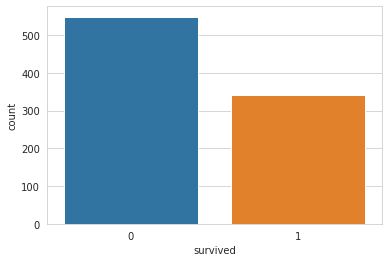

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="survived",data=data)

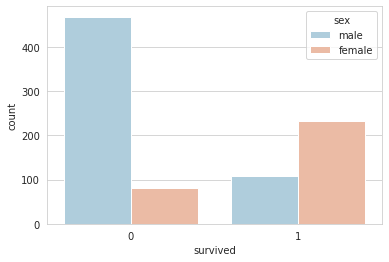

In [ ]:
sns.countplot(x="survived" , hue="sex" ,data=data ,palette ="RdBu_r")

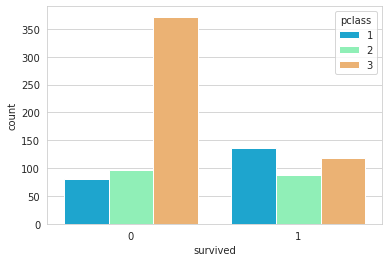

In [ ]:
sns.countplot(x="survived", hue="pclass" , data=data , palette="rainbow")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


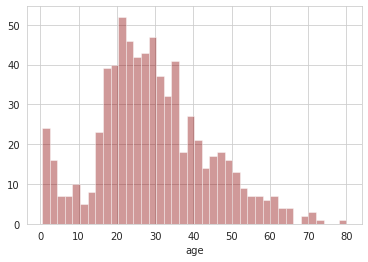

In [ ]:
sns.distplot(data["age"].dropna(),kde=False ,color="darkred",bins=40) 

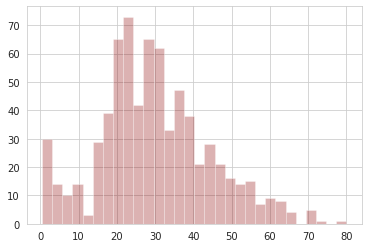

In [ ]:
## Same as the above function
data["age"].hist(bins=30,color="darkred",alpha=0.3)

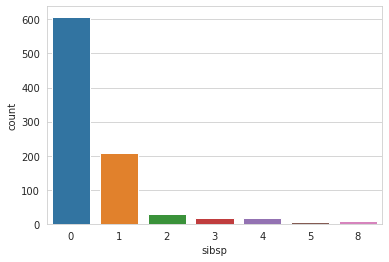

In [ ]:
sns.countplot(x="sibsp",data=data)

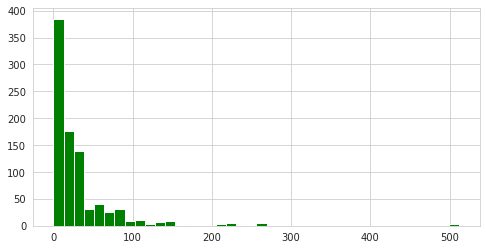

In [ ]:
data["fare"].hist(color="green",bins=40,figsize=(8,4))

# Categorical Variable analysis

Categorical values are values that have no intrinsic ordering thus does make sense to calculate things like average on them

#### *Categorical variable:sex*

In [ ]:
data["sex"].value_counts(dropna=False)

male      577
female    314
Name: sex, dtype: int64

In [ ]:
data[["sex","survived"]].groupby("sex",as_index=False).mean().sort_values(by="survived",ascending=False)
## Females have a better chance of survivel

,sex,survived
0,female,0.742038
1,male,0.188908


Text(0, 0.5, 'Survival Probability')

Text(0.5, 1.0, 'Survival Probability by Gender')

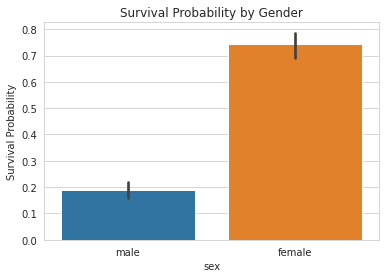

In [ ]:
sns.barplot(x="sex",y="survived" , data=data)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Gender")

#### *Categorical variable:pclass*

In [ ]:
data["pclass"].value_counts(dropna=False)

3    491
1    216
2    184
Name: pclass, dtype: int64

In [ ]:
data[["pclass","survived"]].groupby("pclass",as_index=False).mean().sort_values(by="survived",ascending=False)
## First class have a better chance of survivel

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0, 0.5, 'Survival Probability')

Text(0.5, 1.0, 'Survival Probability by pclass')

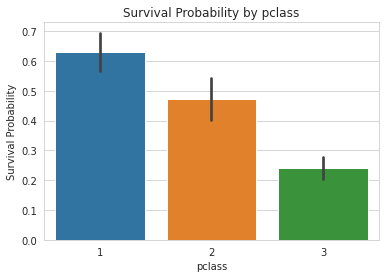

In [ ]:
sns.barplot(x="pclass",y="survived" ,data=data)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by pclass")

Text(0, 0.5, 'Survival Probability')

Text(0.5, 1.0, 'Survival Probability by Passenger age and Passenger class')

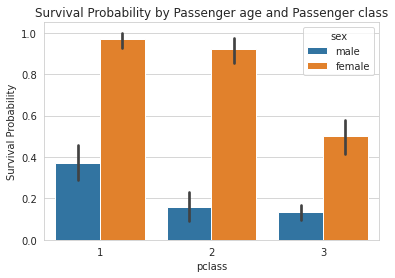

In [ ]:
sns.barplot(x="pclass",y="survived" ,hue="sex",data=data)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Passenger age and Passenger class")
## Females always have a better chance of survival and even better when in the higher passenger class.

#### *Categorical variable:embarked*

In [ ]:
data["embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [ ]:
data[["embarked","survived"]].groupby("embarked",as_index=False).mean().sort_values(by="survived",ascending=False)

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0, 0.5, 'Survival Probability')

Text(0.5, 1.0, 'Survival Probability by Embarkation')

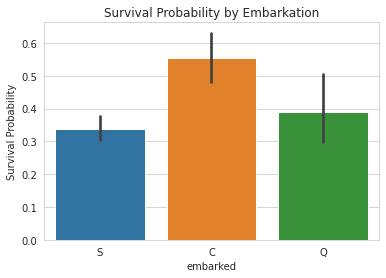

In [ ]:
sns.barplot(x="embarked",y="survived" ,data=data)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Embarkation")
## Point C has has the highest probability of survival

Why is there high probability of survival in C than in the others. Are this embarkation points related to class maybe or gender? Lets test this hypothesis using a factor plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


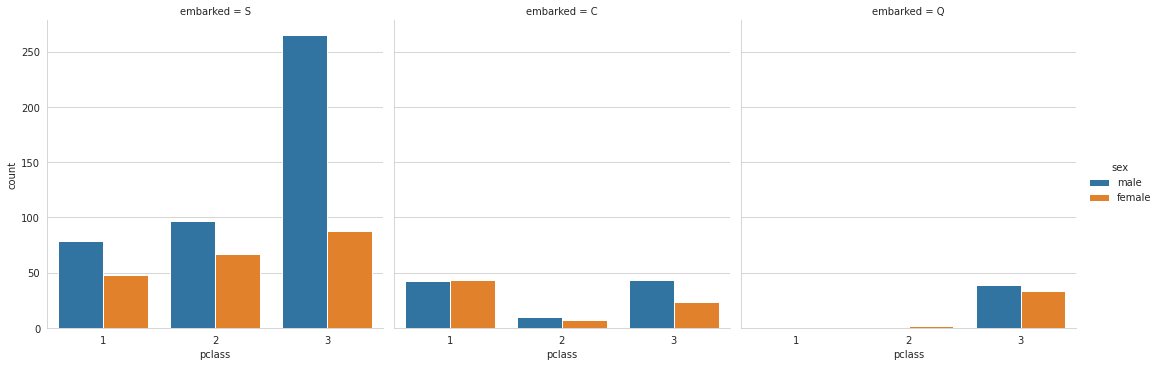

In [ ]:
sns.catplot("pclass", col="embarked" , data=data ,hue="sex", kind="count")

This hypothesis appears to be true because most of the people embarking at point C areof first class

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


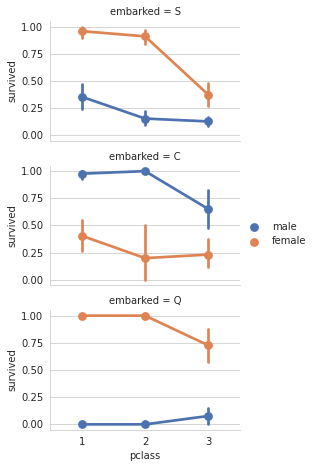

In [ ]:
grid = sns.FacetGrid(data , row="embarked" , size=2.2 , aspect=1.6)
grid.map(sns.pointplot ,"pclass" , "survived" , "sex" ,palette="deep")
grid.add_legend()
## shows relationship between the three variables

# Numerial Variable Analysis

### *Correlation analysis*

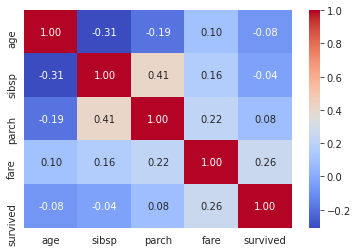

In [ ]:
sns.heatmap(data[['age', 'sibsp', 'parch', 'fare',"survived"]].corr(),annot=True , fmt=".2f",cmap="coolwarm")

## Fare seems to be the only feature with substantial correlation with the survival

### *Numerical variable:Sibsp*

In [ ]:
data["sibsp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [ ]:
data[["sibsp","survived"]].groupby("sibsp",as_index = False ) .mean().sort_values(by="survived",ascending=False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0, 0.5, 'survival probability')

Text(0.5, 1.0, 'Survivel probabilty by SibSp')

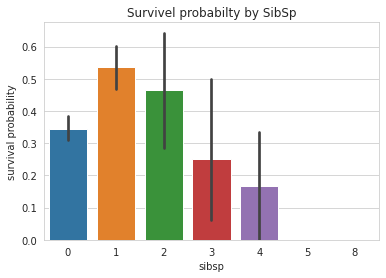

In [ ]:
sns.barplot(x="sibsp",y="survived",data=data)
plt.ylabel("survival probability")
plt.title("Survivel probabilty by SibSp")

### *Numerical variable:Parch*

In [ ]:
data["parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [ ]:
data[["parch","survived"]].groupby("parch",as_index = False ) .mean().sort_values(by="survived",ascending=False)

,parch,survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0, 0.5, 'survival probability')

Text(0.5, 1.0, 'Survivel probabilty by parch')

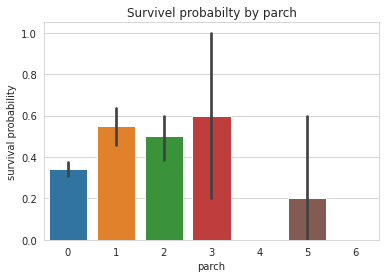

In [ ]:
sns.barplot(x="parch",y="survived",data=data)
plt.ylabel("survival probability")
plt.title("Survivel probabilty by parch")

### *Numerical variable:Age*



In [ ]:
## Value counts only applies if a variable is discrete for continous variables us  a histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Passenger Age distribution')

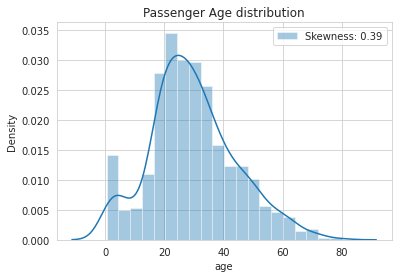

In [ ]:
sns.distplot(data["age"],label="Skewness: %.2f"%(data["age"].skew()))
plt.legend(loc="best")
plt.title("Passenger Age distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


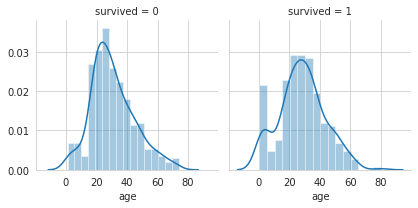

In [ ]:
g=sns.FacetGrid(data , col="survived")
g.map(sns.distplot ,"age")

Text(0.5, 0, 'Age')

Text(0.5, 1.0, 'Passenger age distribution by age')

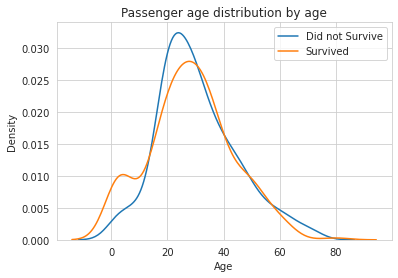

In [ ]:
sns.kdeplot(data["age"][data["survived"]== 0] , label = "Did not Survive")
sns.kdeplot(data["age"][data["survived"]== 1] , label = "Survived")
plt.legend(loc="best")
plt.xlabel("Age")
plt.title("Passenger age distribution by age")

### *Numerical variable:Fare*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Passenger Fare distribution')

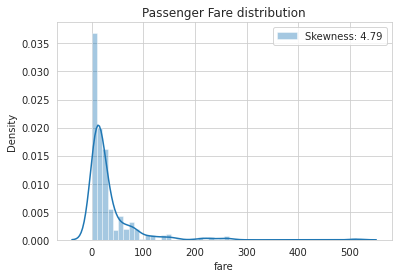

In [ ]:
sns.distplot(data["fare"],label="Skewness: %.2f"%(data["fare"].skew()))
plt.legend(loc="best")
plt.title("Passenger Fare distribution")
## Fare seems to have a high skewness. This will be addressed later on in the notebook through log transformation.

# Data Preprocessing

### *Missing Values*

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percentage = round(data.isnull().sum()/data.shape[0] * 100 , 2)
missing_data = pd.concat([total,percentage], axis=1,keys=["Total","Percentage"])
missing_data[missing_data["Percentage"]>0]

,Total,Percentage
cabin,687,77.10
age,177,19.87
embarked,2,0.22


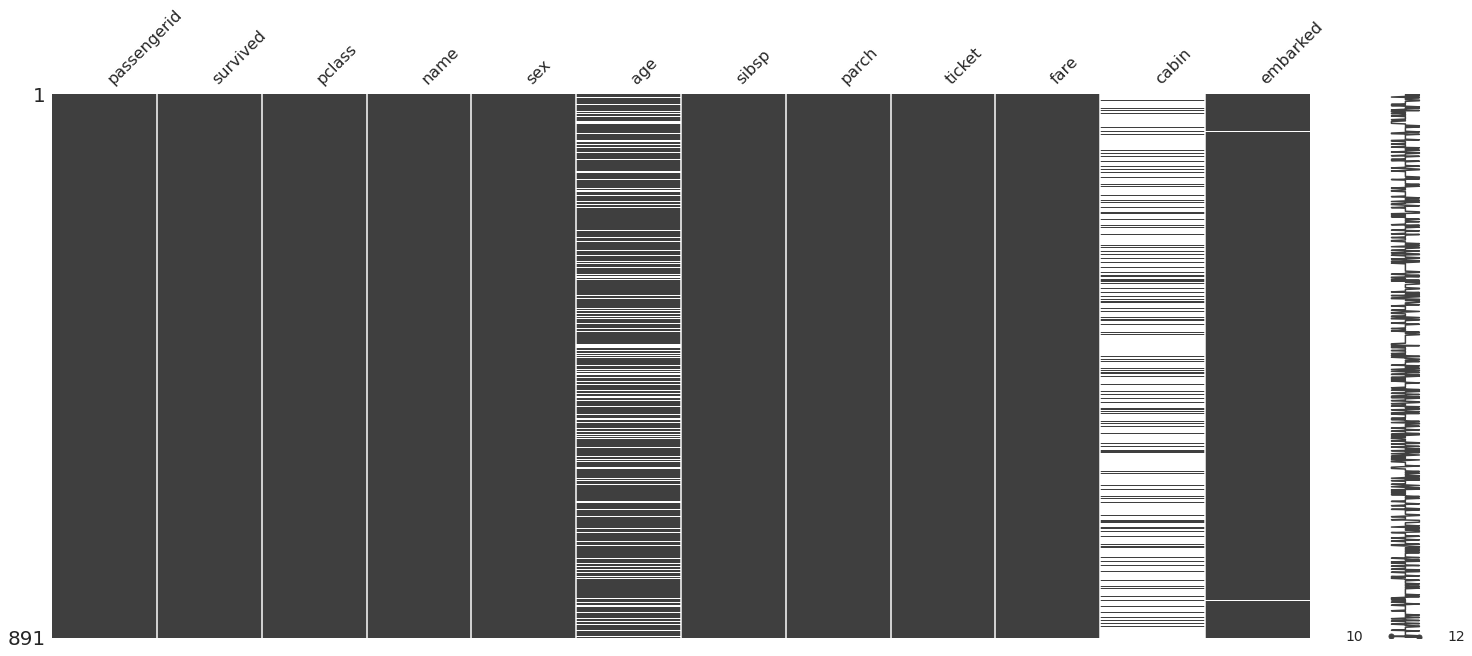

In [ ]:
missingno.matrix(data)

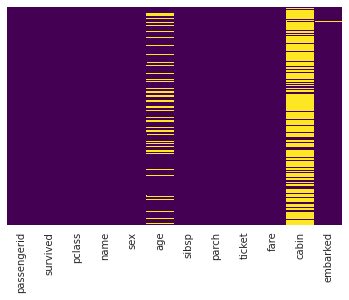

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

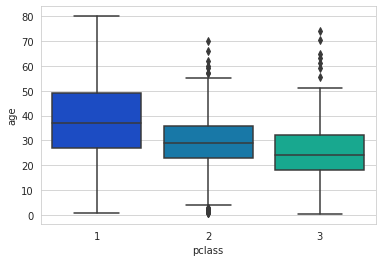

In [ ]:
sns.boxplot(x="pclass" , y="age" ,data=data ,palette="winter")
## Generally old people tend to travel in the higher pclass.

In [ ]:
##  Filling age values in acordance with passenger class as we saw in the above boxplot.
## pclass1= avg_age=(37) ,pclass2 = avg_age(29) , pclass3 =avg_age(24)

def impute_age(cols):
   age=cols[0]
   pclass=cols[1]

   if pd.isnull(age):
     if pclass == 1:
       return 37            
     elif pclass ==2:
        return 29      
     else:
        return 24
      
   else:
       return age

      



In [ ]:
data["age"] = data[["age","pclass"]].apply(impute_age,axis=1)

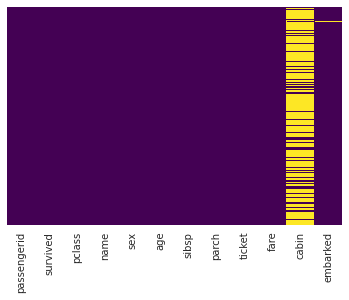

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
## Dropping the cabin column since it has 77% null values
data.drop(["cabin"],axis=1,inplace=True)

In [ ]:
mode = data["embarked"].dropna().mode()[0]
mode
## getting the mode(stage with the highest frequency) in the embarked column

'S'

In [ ]:
## Replacing in null values inembarked column with the most frequent value.
data["embarked"].fillna(mode,inplace=True)

In [ ]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [ ]:
data.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

In [ ]:
data["embarked"].mode()[0]

'S'

### *Outlier Detection and Removal*

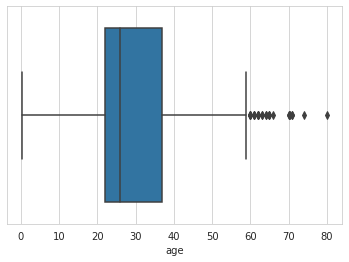

In [ ]:
sns.boxplot(x=data["age"])

[Text(0, 0.5, 'Fare'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Age vs Fare')]

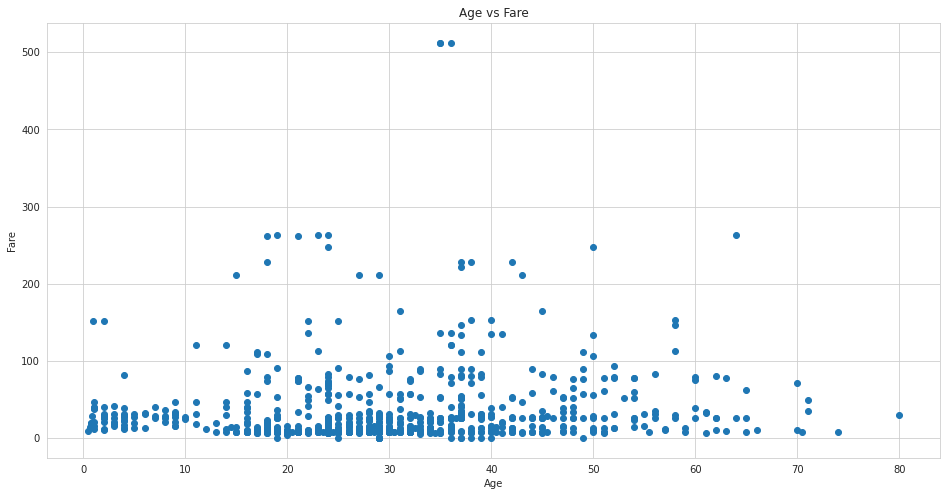

In [ ]:
fig , ax =plt.subplots(figsize=(16,8))
ax.scatter(x="age" ,y="fare" , data=data)
ax.set(xlabel="Age",ylabel="Fare",title="Age vs Fare")

In [ ]:
data[data["age"]<1]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [ ]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(data, 2, ['age', 'sibsp', 'parch', 'fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 13 indices:  [438, 587, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


Code to drop Outliers manually in each column
'' IQR  '''
Q1 = np.percentile(df['age'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['age'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
'' Upper bound '''
upper = np.where(df['age'] >= (Q3+1.5*IQR))
''' Lower bound '''
lower = np.where(df['age'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

```
# This is formatted as code
```



In [ ]:
data.loc[outliers_to_drop ,:]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.00,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,S
159,160,0,3,"Sage, Master. Thomas Henry",male,24.0,8,2,CA. 2343,69.55,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,24.0,8,2,CA. 2343,69.55,S
201,202,0,3,"Sage, Mr. Frederick",male,24.0,8,2,CA. 2343,69.55,S
324,325,0,3,"Sage, Mr. George John Jr",male,24.0,8,2,CA. 2343,69.55,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,S


In [ ]:
## Dropping the outliers
print("Before: {} rows".format(len(data)))
data = data.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(data)))

Before: 891 rows
After: 878 rows


Combining test set and train set

In [ ]:
total = test.isnull().sum().sort_values(ascending=False)
percentage = round(test.isnull().sum()/test.shape[0] * 100 , 2)
missing_data = pd.concat([total,percentage], axis=1,keys=["Total","Percentage"])
missing_data[missing_data["Percentage"]>0]

,Total,Percentage
cabin,327,78.23
age,86,20.57
fare,1,0.24


In [ ]:
test.drop(["cabin"],axis=1,inplace=True)
test["age"] = test[["age","pclass"]].apply(impute_age,axis=1)
median = test["fare"].dropna().median()
test.fillna(median,inplace=True)

In [ ]:
combine = pd.concat([data,test],axis=0).reset_index(drop=True)
combine.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
combine.isnull().sum().sort_values(ascending=False)
## Nb all the missing values in the survived column are from the test set so we will ignore

survived       418
embarked         0
fare             0
ticket           0
parch            0
sibsp            0
age              0
sex              0
name             0
pclass           0
passengerid      0
dtype: int64

In [ ]:
## Convert sex into a numeric value
combine["sex"] = combine["sex"].map({"male":0,"female":1})

In [ ]:
combine["sex"].value_counts()

0    835
1    461
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


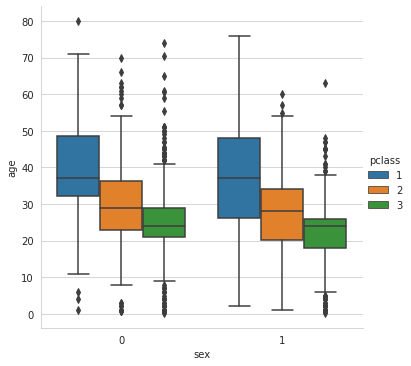

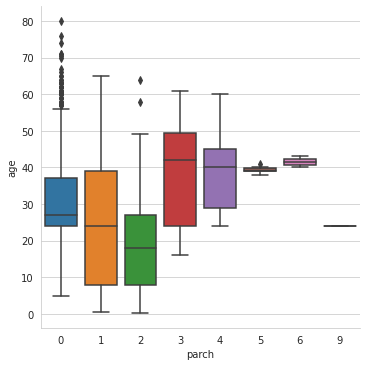

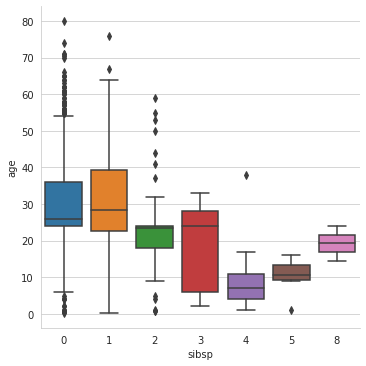

In [ ]:
## Vizualizing the relationship between age , parch and sibsp
sns.factorplot(y="age" , x="sex" , hue="pclass" , kind="box" ,data=combine)
sns.factorplot(y="age",x="parch",kind="box",data=combine)
sns.factorplot(y="age",x="sibsp",kind="box" ,data=combine)

In [ ]:
combine.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [ ]:
combine.drop("ticket",axis=1,inplace=True)

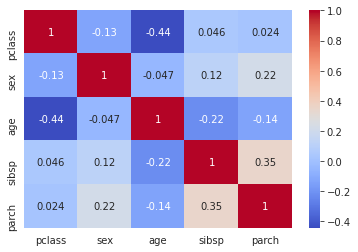

In [ ]:
sns.heatmap(combine.drop(['survived', 'name', 'passengerid', 'fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [ ]:
combine["age"].isnull().sum()

0

### *Data Transformation*

Recall that the fare column has a very high skwness that may affect our model so data transformation will be needed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Passenger Fare Distribution')

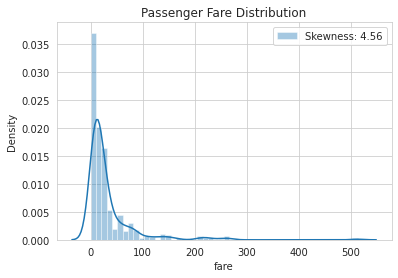

In [ ]:
sns.distplot(combine['fare'], label = 'Skewness: %.2f'%(combine['fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [ ]:
## Perform log transformation
combine["fare"]= combine["fare"].map(lambda x: np.log(x) if x > 0 else 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Passenger Fare Distribution')

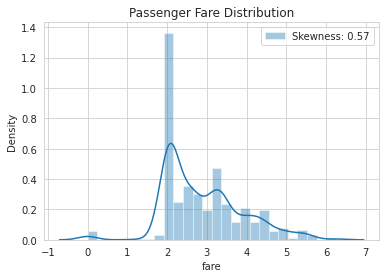

In [ ]:
sns.distplot(combine['fare'], label = 'Skewness: %.2f'%(combine['fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')
## As we can see skewness has dropped to 0.57

### *Feature Engineering*

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

#### Title

In [ ]:
## Creating a column to get the honoric(title) from each name
combine["title"] = [ str(name.split(",")[1].split(".")[0]) for name in combine["name"]]
combine[["name","title"]].head()

,name,title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [ ]:
combine["title"].value_counts()

 Mr              751
 Miss            255
 Mrs             197
 Master           60
 Dr                8
 Rev               8
 Col               4
 Ms                2
 Mlle              2
 Major             2
 Lady              1
 the Countess      1
 Mme               1
 Don               1
 Jonkheer          1
 Dona              1
 Sir               1
Name: title, dtype: int64

In [ ]:
combine['title'] = combine['title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona',"Rarea"], 'Rare',regex=True)
combine['title'] = combine['title'].replace(['Mlle', 'Ms'], 'Miss',regex=True)
combine['title'] = combine['title'].replace('Mme', 'Mrs',regex=True)
## Replacing the less familiar titles with known ones for better modelling

In [ ]:
combine["title"].nunique()

5

In [ ]:
combine["title"].value_counts()

 Mr        751
 Miss      259
 Mrs       198
 Master     60
 Rare       28
Name: title, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


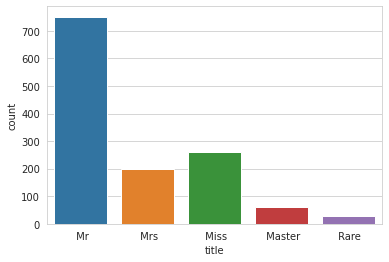

In [ ]:
sns.countplot(combine["title"])

In [ ]:
combine[['title', 'survived']].groupby(['title'], as_index = False).mean().sort_values(by = 'survived', ascending = False)

,title,survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.363636
2,Mr,0.156556


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(6.799999999999997, 0.5, 'Survival Probability')

Text(0.5, 1.0, 'Mean of survival by Title')

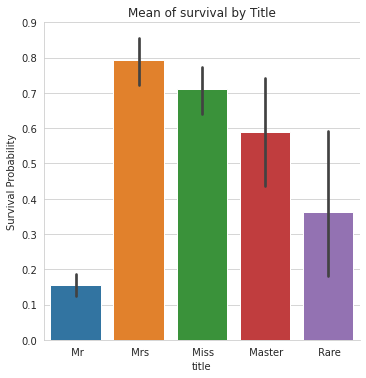

In [ ]:
sns.factorplot(x = 'title', y = 'survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [ ]:
combine.drop("name",axis=1,inplace=True)

In [ ]:
combine.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


#### Is Alone

In [ ]:
combine["familysize"]=combine["sibsp"]+combine["parch"]+1
combine[["sibsp","parch","familysize"]].head()

,sibsp,parch,familysize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [ ]:
combine[["familysize","survived"]].groupby("familysize" , as_index=False).mean().sort_values(by="survived",ascending=False)

,familysize,survived
3,4,0.724138
2,3,0.580000
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.055556
7,8,0.000000
8,11,NaN


In [ ]:
combine["isalone"]=0
combine.loc[combine["familysize"]==1,"isalone"] =1

In [ ]:
combine[["isalone","survived"]].groupby("isalone" , as_index=False).mean().sort_values(by="survived",ascending=False)
## Probability of surviving when alone is very low 

,isalone,survived
0,0,0.516129
1,1,0.303538


In [ ]:
combine.drop(["sibsp","parch","familysize"],axis=1,inplace=True)

In [ ]:
combine.head()

,passengerid,survived,pclass,sex,age,fare,embarked,title,isalone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


#### age*Class

In [ ]:
combine["ageband"] = pd.cut(combine["age"],5)
combine[["ageband","survived"]].groupby("ageband",as_index=False).mean().sort_values(by="ageband")

,ageband,survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.339545
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.432836
4,"(64.034, 80.0]",0.100000


In [ ]:
# Assign ordinals to each age band 

combine.loc[combine['age'] <= 16.136, 'age'] = 0
combine.loc[(combine['age'] > 16.136) & (combine['age'] <= 32.102), 'age'] = 1
combine.loc[(combine['age'] > 32.102) & (combine['age'] <= 48.068), 'age'] = 2
combine.loc[(combine['age'] > 48.068) & (combine['age'] <= 64.034), 'age'] = 3
combine.loc[combine['age'] > 64.034 , 'age'] = 4

In [ ]:
combine.head()

,passengerid,survived,pclass,sex,age,fare,embarked,title,isalone,ageband
0,1,0.0,3,0,1.0,1.981001,S,Mr,0,"(16.136, 32.102]"
1,2,1.0,1,1,2.0,4.266662,C,Mrs,0,"(32.102, 48.068]"
2,3,1.0,3,1,1.0,2.070022,S,Miss,1,"(16.136, 32.102]"
3,4,1.0,1,1,2.0,3.972177,S,Mrs,0,"(32.102, 48.068]"
4,5,0.0,3,0,2.0,2.085672,S,Mr,1,"(32.102, 48.068]"


In [ ]:
combine[['age', 'pclass']].dtypes

age       float64
pclass      int64
dtype: object

In [ ]:
combine['age'] = combine['age'].astype('int')
combine['age'].dtype

dtype('int64')

In [ ]:
combine['age*class'] = combine['age'] * combine['pclass']
combine[['age', 'pclass', 'age*class']].head()

,age,pclass,age*class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [ ]:
combine.drop("ageband",axis=1,inplace=True)

### Feature Encoding

In [ ]:
## Encoding embarked and title columns

combine = pd.get_dummies(combine,columns=["title"])
combine = pd.get_dummies(combine,columns=["embarked"],prefix="em")
combine.head()

,passengerid,survived,pclass,sex,age,fare,isalone,age*class,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rare,em_C,em_Q,em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [ ]:
# Divide Fare into four bands

combine['fareband'] = pd.cut(combine['fare'], 4)
combine[['fareband', 'survived']].groupby(['fareband'], as_index=False).mean().sort_values(by = 'fareband')

,fareband,survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517123
3,"(4.679, 6.239]",0.765957


In [ ]:
# Assign ordinal to each fare band

combine.loc[combine['fare'] <= 1.56, 'fare'] = 0
combine.loc[(combine['fare'] > 1.56) & (combine['fare'] <= 3.119), 'fare'] = 1
combine.loc[(combine['fare'] > 3.119) & (combine['fare'] <= 4.679), 'fare'] = 2
combine.loc[combine['fare'] > 4.679, 'fare'] = 3

In [ ]:
# Convert Fare into integer

combine['fare'] = combine['fare'].astype('int')
combine['fare'].dtype

dtype('int64')

In [ ]:
combine = combine.drop('fareband', axis = 1)

In [ ]:
combine.head()

,passengerid,survived,pclass,sex,age,fare,isalone,age*class,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rare,em_C,em_Q,em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [ ]:
# Separate training and test set from the combined dataframe

train = combine[:len(data)]
test = combine[len(data):]

In [ ]:
train.tail()

,passengerid,survived,pclass,sex,age,fare,isalone,age*class,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rare,em_C,em_Q,em_S
873,887,0.0,2,0,1,1,1,2,0,0,0,0,1,0,0,1
874,888,1.0,1,1,1,2,1,1,0,1,0,0,0,0,0,1
875,889,0.0,3,1,1,2,0,3,0,1,0,0,0,0,0,1
876,890,1.0,1,0,1,2,1,1,0,0,1,0,0,1,0,0
877,891,0.0,3,0,1,1,1,3,0,0,1,0,0,0,1,0


In [ ]:
test.head()

,passengerid,survived,pclass,sex,age,fare,isalone,age*class,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ Rare,em_C,em_Q,em_S
878,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
879,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
880,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
881,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
882,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [ ]:
train = train.drop('passengerid', axis = 1)
train['survived'] = train['survived'].astype('int')
test = test.drop('passengerid', axis = 1)
test = test.drop('survived', axis = 1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   survived       878 non-null    int64
 1   pclass         878 non-null    int64
 2   sex            878 non-null    int64
 3   age            878 non-null    int64
 4   fare           878 non-null    int64
 5   isalone        878 non-null    int64
 6   age*class      878 non-null    int64
 7   title_ Master  878 non-null    uint8
 8   title_ Miss    878 non-null    uint8
 9   title_ Mr      878 non-null    uint8
 10  title_ Mrs     878 non-null    uint8
 11  title_ Rare    878 non-null    uint8
 12  em_C           878 non-null    uint8
 13  em_Q           878 non-null    uint8
 14  em_S           878 non-null    uint8
dtypes: int64(7), uint8(8)
memory usage: 55.0 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 878 to 1295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   pclass         418 non-null    int64
 1   sex            418 non-null    int64
 2   age            418 non-null    int64
 3   fare           418 non-null    int64
 4   isalone        418 non-null    int64
 5   age*class      418 non-null    int64
 6   title_ Master  418 non-null    uint8
 7   title_ Miss    418 non-null    uint8
 8   title_ Mr      418 non-null    uint8
 9   title_ Mrs     418 non-null    uint8
 10  title_ Rare    418 non-null    uint8
 11  em_C           418 non-null    uint8
 12  em_Q           418 non-null    uint8
 13  em_S           418 non-null    uint8
dtypes: int64(6), uint8(8)
memory usage: 23.0 KB


Yeeeeeeiyy, after all the wrangling finally the data is ready for modelling.

# Modelling